In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('data.csv')
df.drop('URL', axis='columns', inplace=True)
df

,Position,Track Name,Artist,Streams,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
1,2,Chantaje,Shakira,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec
4,5,Safari,J Balvin,14269,2017-01-01,ec
...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,2018-01-09,hk


# **Biểu đồ Choropleth Maps** 

### Mục tiêu: 
- Trực quan lượng streams theo từng quốc gia với biểu đồ thế giới.

### Tiền xử lý dữ liệu: 
- Tính tổng lượng streams theo từng quốc gia.
- Lược bỏ dòng lượng streams trên toàn cầu.
### Các trường dữ liệu tương tác: 
- Region, Streams, Country Name, Alpha-3 code. 
  
Trong đó Country Name và Alpha-3 code lần lượt là tên đầy đủ của quốc gia và mã alpha-3 của quốc gia ứng với mã region, được thêm vào theo dữ liệu của Wikipedia. Mục đích thêm vào để phục vụ cho việc truyền thuộc tính vào hàm trực quan Choropleth Maps.

Link: https://www.kaggle.com/datasets/juanumusic/countries-iso-codes

### Mục tiêu khi chọn Choropleth Maps để trực quan:
- Biểu đồ sinh động, bắt mắt và vẫn đảm bảo rõ ràng cho người xem thu thập được các thông tin hữu ích.
- Từ việc trực quan, ta sẽ biết xu hướng lượt streams của các quốc gia hay những vùng châu lục.

### Màu sắc dùng để trực quan: 
- Xanh lá kết hợp phương pháp saturation.
- Giải thích: Việc sử dụng màu sắc như thế này sẽ tạo ra sự đơn giản, giúp người xem dễ quan sát, so sánh mức độ lượt streams ở từng quốc gia. Một điều nữa bảng màu này có độ tương phản với màu xanh dương, màu mặc định của biểu đồ Choropleth Maps giúp chúng ta phân biệt dễ dàng quốc gia nằm/không nằm trong top lượt streams.

### Các kỹ thuật sử dụng thêm:
- Reduce: Lược bỏ đi dòng tính tổng lượng streams của GLOBAL.

## Tính tổng lượng streams theo từng quốc gia

In [3]:
# Tính tổng số lượng người nghe theo từng quốc gia
grouped_by_region_df = df.groupby("Region")["Streams"].sum().reset_index()
grouped_by_region_df["Region"] = grouped_by_region_df["Region"].str.upper()

In [4]:
df_countries = pd.read_csv("wikipedia-iso-country-codes.csv")
# Gộp dữ liệu dựa trên cột chung là mã quốc gia viết tắt
grouped_by_region_df = pd.merge(grouped_by_region_df, df_countries, left_on="Region", right_on="Alpha-2 code", how="left")

In [5]:
grouped_by_region_df = grouped_by_region_df.drop('Alpha-2 code', axis = 1)

In [6]:
grouped_by_region_df.rename(columns = {'English short name lower case':'Country name'}, inplace = True)

In [7]:
grouped_by_region_df.drop(21, inplace=True)

In [8]:
grouped_by_region_df

,Region,Streams,Country name,Alpha-3 code
0,AR,2776971684,Argentina,ARG
1,AT,344322232,Austria,AUT
2,AU,3372128479,Australia,AUS
3,BE,556799739,Belgium,BEL
4,BO,97248182,Bolivia,BOL
5,BR,6890194505,Brazil,BRA
6,CA,3201208648,Canada,CAN
7,CH,487115409,Switzerland,CHE
8,CL,2191334779,Chile,CHL
9,CO,834076562,Colombia,COL


## Vẽ biểu đồ Choropleth Maps

In [9]:
fig = px.choropleth(grouped_by_region_df, locations="Alpha-3 code",
                    color="Streams", 
                    projection='orthographic',
                    hover_name='Country name', # column to add to hover information
                    color_continuous_scale='Greens')

fig.show()

# Phân tích kết quả biểu đồ: 
- Nước Mỹ đóng góp tổng lượt streams cao nhất và rất trội so với các quốc gia còn lại.
- Các quốc gia Nam Mỹ và Châu Âu cũng có nhu cầu nghe nhạc khá lớn.
- Tại Châu Á: Úc, New Zealand và một số quốc gia trong Đông Nam Á như Malaysia, Indonesia, v.v. cũng đóng góp vào top quốc gia có tổng lượt streams cao.

# <span style="color: orange;">**Nước Mỹ là một thị trường tiềm năng cho các ca sĩ Việt Nam khi muốn đưa sản phẩm của mình đến với khán giả quốc tế. Hãy cùng phân tích thị trường này để giúp các nghệ sĩ trong nước có vài thông tin bổ ích!**</span>

## Tiền xử lý dữ liệu
- Lọc dữ liệu đến từ nước Mỹ.
- Loại bỏ các thuộc tính 'Position', 'Region'

In [10]:
#####
usa_df = df[df['Region'] == 'us']
usa_df = usa_df.rename(columns={'Streams': 'US_Streams'})
usa_df.drop(['Position','Region'], axis='columns', inplace=True)
usa_df['Date'] = pd.to_datetime(usa_df['Date'])
usa_df

,Track Name,Artist,US_Streams,Date
771622,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,2017-01-01
771623,Fake Love,Drake,1180074,2017-01-01
771624,Starboy,The Weeknd,1064351,2017-01-01
771625,Closer,The Chainsmokers,1010492,2017-01-01
771626,Black Beatles,Rae Sremmurd,874289,2017-01-01
...,...,...,...,...
845817,Portland,Drake,184537,2018-01-09
845818,All On Me,Devin Dawson,184519,2018-01-09
845819,From The D To The A (feat. Lil Yachty),Tee Grizzley,184428,2018-01-09
845820,Now Or Never,Halsey,184394,2018-01-09


# **Biểu đồ Donut Chart**

### Mục tiêu: 
- Trực quan tỉ lệ lượng streams 3 bài hát nhiều lượt streams nhất nước Mỹ theo các ngày trong tuần.

### Tiền xử lý dữ liệu: 
- Tính tổng lượt streams theo từng bài hát rồi sau đó tìm ra 3 bài hát nhiều lượng streams nhất.
- Thêm vào cột 'DayOfWeek' là thứ trong tuần tương ứng với ngày đó.
- Tính tổng lượng streams của mỗi bài hát theo mỗi thứ trong tuần và sử dụng kỹ thuật chuẩn hóa dữ liệu.
- Loại bỏ thuộc tính 'Artist', 'Date', 'Region'.
### Các trường dữ liệu tương tác: 
- Track Name, DayOfWeek, US_Streams.

Trong đó US_Streams là tổng lượng streams theo từng bài hát.  
### Mục tiêu khi chọn Donut Chart để trực quan:
- Donut Chart có thể xem như 1 biến thể hình thức của Pie Chart, biểu đồ trông sẽ sinh động và mới mẻ hơn.
- Việc trực quan lượt streams theo 7 ngày trong tuần của bài nhạc sẽ chia thành 7 miền, vì vậy sử dụng Donut Chart là 1 biểu đồ hợp lý để người dùng tiện theo dõi và rút trích được thông tin bổ ích.
### Màu sắc dùng để trực quan: 
- Xanh dương kết hợp phương pháp saturation.
- Giải thích: Việc sử dụng màu sắc như thế này sẽ tạo ra sự đơn giản, giúp người xem dễ quan sát, so sánh mức độ lượt streams theo từng thứ trong tuần. 
### Lý do sử dụng 3 biểu đồ Donut Chart cùng lúc:
- Việc sử dụng như thế này giúp người dùng quan sát được lượng streams phân bổ mỗi thứ trong tuần của 3 bài hát thịnh hành nhất, từ đó đối chiếu, so sánh và rút thêm được nhiều thông tin có cơ sở hơn. Đôi khi chỉ chọn 1 bài hát để trực quan rồi rút ra kết luận sẽ không đảm bảo được thông tin là minh bạch.
### Các kỹ thuật sử dụng thêm:
- Reduce: Giảm đi một số thuộc tính như 'Artist', 'Region', 'Date'.


In [11]:
# Tính tổng số lượng người nghe theo từng bài hát
grouped_by_trackname_df = usa_df.groupby("Track Name")["US_Streams"].sum().reset_index()
grouped_by_trackname_df

,Track Name,US_Streams
0,'Till I Collapse,36493752
1,(Don't Fear) The Reaper,543066
2,(I Can't Get No) Satisfaction - Mono Version /...,144843
3,(Intro) I'm so Grateful,208805
4,(Not) The One,195340
...,...,...
1619,top priority (with Ne-Yo),224615
1620,up in this (with Tinashe),222339
1621,wokeuplikethis*,80890486
1622,Échame La Culpa,16927120


In [12]:
# Trích xuất 3 bài hát có Streams cao nhất
top_3_track = grouped_by_trackname_df.nlargest(3, 'US_Streams')

In [13]:
top_3_track

,Track Name,US_Streams
549,HUMBLE.,339677217
1564,XO TOUR Llif3,316206696
278,Congratulations,285451131


In [14]:
filtered_top_3_artist_df = usa_df[usa_df['Track Name'].isin(top_3_track['Track Name'].tolist())]
filtered_top_3_artist_df['Date'] = pd.to_datetime(filtered_top_3_artist_df['Date'])
filtered_top_3_artist_df['DayOfWeek'] = filtered_top_3_artist_df['Date'].dt.day_name()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27472\2417418174.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_27472\2417418174.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
filtered_top_3_artist_df

,Track Name,Artist,US_Streams,Date,DayOfWeek
771738,Congratulations,Post Malone,192751,2017-01-01,Sunday
771919,Congratulations,Post Malone,197483,2017-01-02,Monday
772115,Congratulations,Post Malone,227826,2017-01-03,Tuesday
772307,Congratulations,Post Malone,237540,2017-01-04,Wednesday
772508,Congratulations,Post Malone,242199,2017-01-05,Thursday
...,...,...,...,...,...
845450,Congratulations,Post Malone,571791,2018-01-08,Monday
845451,HUMBLE.,Kendrick Lamar,570619,2018-01-08,Monday
845638,XO TOUR Llif3,Lil Uzi Vert,677543,2018-01-09,Tuesday
845643,HUMBLE.,Kendrick Lamar,643860,2018-01-09,Tuesday


In [16]:
# Tính tổng số streams của mỗi bài hát theo thứ trong tuần
total_streams_by_day = filtered_top_3_artist_df.groupby(['Track Name', 'DayOfWeek'])['US_Streams'].mean()
total_streams_by_day = pd.DataFrame(total_streams_by_day)
total_streams_by_day

US_Streams
Track Name      DayOfWeek              
Congratulations Friday     8.127520e+05
                Monday     7.457200e+05
                Saturday   7.777419e+05
                Sunday     7.073977e+05
                Thursday   7.970540e+05
                Tuesday    7.674960e+05
                Wednesday  7.803500e+05
HUMBLE.         Friday     1.294682e+06
                Monday     1.175383e+06
                Saturday   1.235551e+06
                Sunday     1.101415e+06
                Thursday   1.222328e+06
                Tuesday    1.197491e+06
                Wednesday  1.207459e+06
XO TOUR Llif3   Friday     1.140684e+06
                Monday     1.061577e+06
                Saturday   1.112653e+06
                Sunday     1.016077e+06
                Thursday   1.133705e+06
                Tuesday    1.086539e+06
                Wednesday  1.110394e+06

In [17]:
dict_total_streams_by_day = total_streams_by_day.to_dict()
dict_total_streams_by_day

{'US_Streams': {('Congratulations', 'Friday'): 812752.0192307692,
  ('Congratulations', 'Monday'): 745720.0370370371,
  ('Congratulations', 'Saturday'): 777741.9056603773,
  ('Congratulations', 'Sunday'): 707397.6666666666,
  ('Congratulations', 'Thursday'): 797053.9811320754,
  ('Congratulations', 'Tuesday'): 767496.0188679246,
  ('Congratulations', 'Wednesday'): 780349.9807692308,
  ('HUMBLE.', 'Friday'): 1294682.1,
  ('HUMBLE.', 'Monday'): 1175383.3414634147,
  ('HUMBLE.', 'Saturday'): 1235550.5609756098,
  ('HUMBLE.', 'Sunday'): 1101414.536585366,
  ('HUMBLE.', 'Thursday'): 1222327.55,
  ('HUMBLE.', 'Tuesday'): 1197490.825,
  ('HUMBLE.', 'Wednesday'): 1207459.282051282,
  ('XO TOUR Llif3', 'Friday'): 1140683.5853658537,
  ('XO TOUR Llif3', 'Monday'): 1061576.7857142857,
  ('XO TOUR Llif3', 'Saturday'): 1112652.9285714286,
  ('XO TOUR Llif3', 'Sunday'): 1016077.380952381,
  ('XO TOUR Llif3', 'Thursday'): 1133705.1219512196,
  ('XO TOUR Llif3', 'Tuesday'): 1086539.0731707318,
  ('XO 

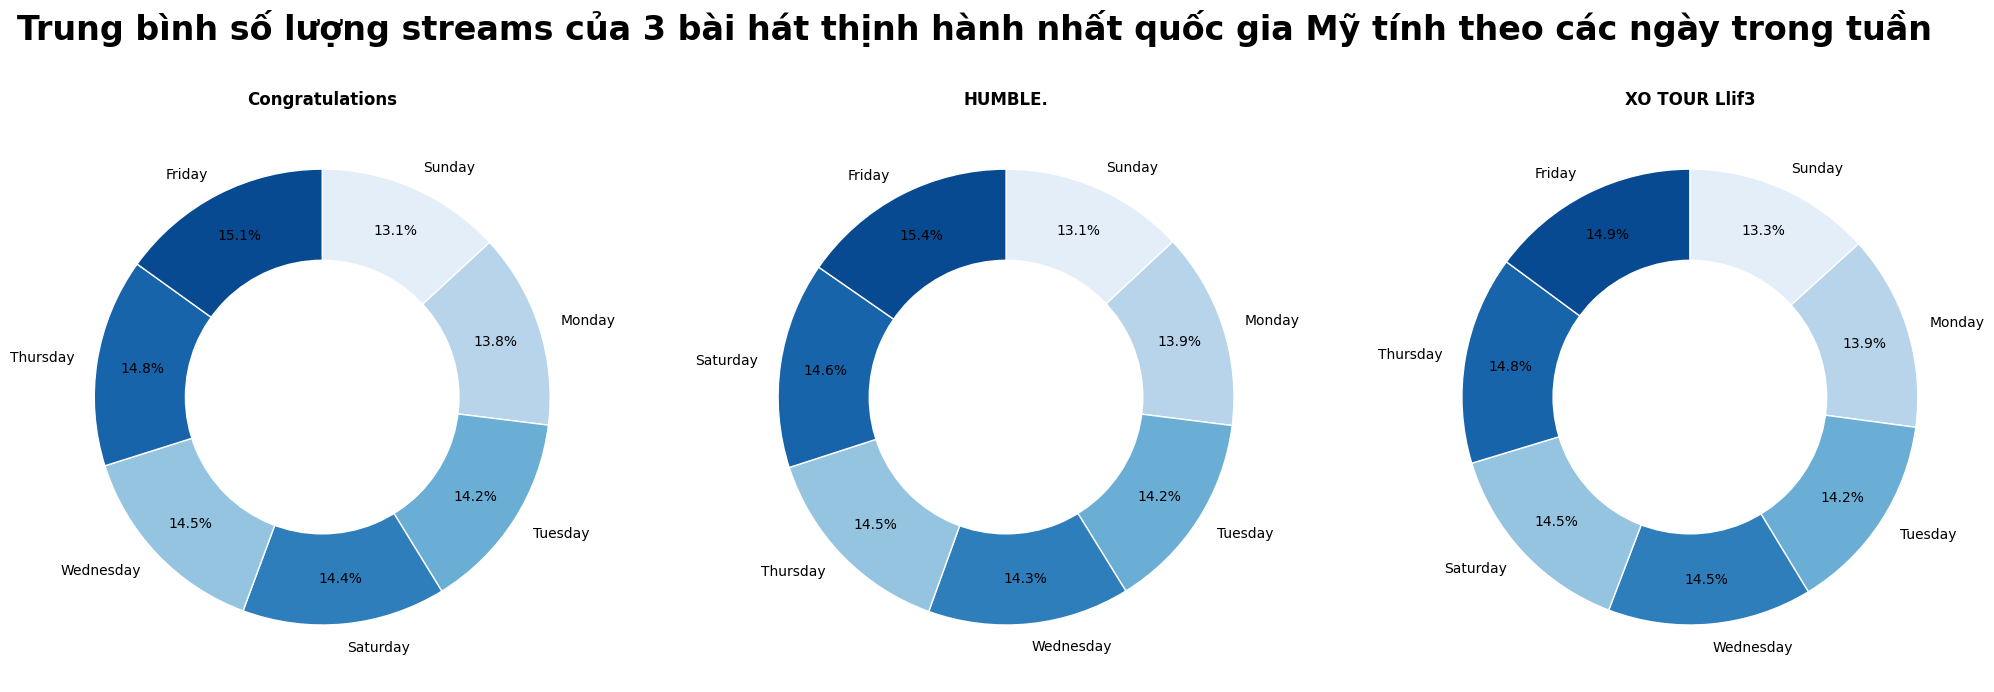

In [18]:
# Tách dữ liệu theo từng bài hát
congratulations_data = {}
humble_data = {}
xotour_data = {}

for key in dict_total_streams_by_day['US_Streams']:
    if key[0] =='Congratulations':
        congratulations_data[key[1]]= dict_total_streams_by_day['US_Streams'][key]
    elif key[0] =='HUMBLE.':
        humble_data[key[1]]= dict_total_streams_by_day['US_Streams'][key]
    else:
        xotour_data[key[1]]= dict_total_streams_by_day['US_Streams'][key]

congratulations_data = dict(sorted(congratulations_data.items(), key=lambda x: x[1]))
humble_data = dict(sorted(humble_data.items(), key=lambda x: x[1]))
xotour_data = dict(sorted(xotour_data.items(), key=lambda x: x[1]))
intensities = [0.1, 0.3, 0.5, 0.7, 0.4, 0.8, 0.9]
cmap = plt.get_cmap('Blues')
colors = [cmap(intensity) for intensity in intensities]


# Vẽ biểu đồ donut

fig, ax = plt.subplots(1, 3, figsize=(25, 8))
# Vẽ biểu đồ donut thứ nhất
ax[0].pie(congratulations_data.values(), labels=congratulations_data.keys(), colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'},autopct='%1.1f%%',pctdistance=0.80)
ax[0].set_title('Congratulations',fontweight='bold')
ax[0].pie([1], radius=0.6, colors='white', wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Vẽ biểu đồ donut thứ hai
ax[1].pie(humble_data.values(), labels=humble_data.keys(), colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'},autopct='%1.1f%%',pctdistance=0.80)
ax[1].set_title('HUMBLE.',fontweight='bold')
ax[1].pie([1], radius=0.6, colors='white', wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Vẽ biểu đồ donut thứ ba
ax[2].pie(xotour_data.values(), labels=xotour_data.keys(), colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'},autopct='%1.1f%%',pctdistance=0.80)
ax[2].set_title('XO TOUR Llif3',fontweight='bold')
ax[2].pie([1], radius=0.6, colors='white', wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Hiển thị biểu đồ
fig.suptitle('Trung bình số lượng streams của 3 bài hát thịnh hành nhất quốc gia Mỹ tính theo các ngày trong tuần',fontweight='bold',fontsize = 24)
plt.show()


# Phân tích kết quả biểu đồ: 
- Từ biểu đồ ta rút ra được 1 điều bất ngờ là cả 3 bài hát có sự phân bổ lượng streams theo từng thứ trong tuần rất giống nhau.
- Từ 3 biểu đồ đều cho thấy lượng streams của mỗi bài hát sẽ cao nhất vào thứ 6, thấp nhất vào chủ nhật. Tuy nhiên sự chênh lệch giữa ngày cao nhất và thấp nhất chỉ ~ 2.3%
- Tỷ lệ xếp hạng lượng streams theo từng thứ của mỗi bài hát đều giống nhau, chỉ khác về số liệu tuy nhiên sự chênh lệch này không nhiều.
- Từ đó ta thấy lượng streams của khán giả đóng góp cho từng bài hát khá ổn định.

# **Biểu đồ Line Chart**

### Mục tiêu: 
- Trực quan xu hướng tăng, giảm lượng streams giữa nước Mỹ với tổng các quốc gia khác trong 4 tuần gần nhất.

### Tiền xử lý dữ liệu: 
- Tính tổng lượt streams theo từng ngày.
- Lọc ra dữ liệu của 1 tháng gần nhất.
- Loại bỏ thuộc tính 'Artist', 'Track Name', 'Region'.
### Các trường dữ liệu tương tác: 
- Date, Streams, US_Streams.

### Mục tiêu khi chọn biểu đồ đường để trực quan:
- Biểu đồ đường mạnh trong việc trực quan xu hướng tăng giảm.
- Quan sát dễ dàng dữ liệu ở ngày nào đạt đỉnh hay chạm đáy.
- Là một biểu đồ tốt đối với quan sát sử dụng 1 đến 3 đường dữ liệu.
### Màu sắc dùng để trực quan: 
- Xanh dương và cam.
- Giải thích: Việc sử dụng 2 màu sắc này có độ tương phản cao giúp người xem phân biệt được 2 đường từ đó dễ dàng quan sát thông tin hơn.
### Lý do sử dụng 2 đường:
- Việc sử dụng như thế này giúp người dùng quan sát xu hướng nghe nhạc của quốc gia có lượng streams cao nhất so với tổng của các quốc gia khác. Từ đó chúng ta rút được các thống kê về xu hướng, sự tương đồng hay khác nhau giữa 2 đường.

### Các kỹ thuật sử dụng thêm:
- Reduce: Giảm đi một số thuộc tính như 'Artist', 'Track Name', 'Region'.
- Đối với dữ liệu ở mỗi ngày, lượng streams ở nước Mỹ được biểu diễn bằng chấm tròn và các quốc gia khác là chấm vuông gợi sự khác biệt giữa 2 loại dữ liệu đang so sánh.
- Việc chia biểu đồ thành 2 phần trực quan cho 14 ngày đầu, và 14 ngày sau sẽ giúp người xem dễ dàng theo dõi. Dữ liệu khi quan sát sẽ "thoáng" hơn thay vì khá sát nhau và ta không thể rút trích được thông tin gì từ việc quan sát.

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
# Tạo chuỗi ngày gần nhất trong 1 tháng gần nhất
recent_dates = pd.date_range(end='2018-01-09', periods=28)

# Lọc dữ liệu theo chuỗi ngày gần nhất
recent_df = df[df['Date'].isin(recent_dates)]
recent_df = recent_df[recent_df['Region'] != 'us']
recent_usa_df = usa_df[usa_df['Date'].isin(recent_dates)]
# Tính tổng số lượng người nghe theo từng ngày
grouped_by_date_df = recent_df.groupby("Date")["Streams"].sum().reset_index()
grouped_by_date_usa_df = recent_usa_df.groupby("Date")["US_Streams"].sum().reset_index()
merged_grouped_by_date_df = pd.merge(grouped_by_date_df, grouped_by_date_usa_df, on='Date')
cols = ['Streams','US_Streams']
normalized_merged_grouped_by_date_df = (merged_grouped_by_date_df[cols] - merged_grouped_by_date_df[cols].min()) / (merged_grouped_by_date_df[cols].max() - merged_grouped_by_date_df[cols].min())
# Gộp kết quả chuẩn hóa với các cột còn lại trong DataFrame
normalized_merged_grouped_by_date_df = pd.concat([merged_grouped_by_date_df.drop(cols, axis=1),normalized_merged_grouped_by_date_df], axis=1)


In [20]:
normalized_merged_grouped_by_date_df

,Date,Streams,US_Streams
0,2017-12-13,0.232804,0.417095
1,2017-12-14,0.248170,0.428772
2,2017-12-15,0.455502,0.657370
3,2017-12-16,0.416581,0.511701
4,2017-12-17,0.185348,0.217371
5,2017-12-18,0.248184,0.380006
6,2017-12-19,0.308129,0.446865
7,2017-12-20,0.355819,0.454612
8,2017-12-21,0.402572,0.469606
9,2017-12-22,0.540493,0.809447


In [21]:
# Chia dữ liệu thành 2 phần: 14 ngày đầu và 14 ngày sau
df_first_half = normalized_merged_grouped_by_date_df[:14]
df_second_half = normalized_merged_grouped_by_date_df[14:]

# Tạo biểu đồ cho 14 ngày đầu
fig_first_half = go.Figure()
fig_first_half.add_trace(go.Scatter(x=df_first_half['Date'], y=df_first_half['US_Streams'], name="US_Streams", mode='markers+lines', line=dict(color='blue', width=2), marker=dict(symbol='circle')))
fig_first_half.add_trace(go.Scatter(x=df_first_half['Date'], y=df_first_half['Streams'], name="Other countries's Streams", mode='markers+lines', line=dict(color='orange', width=2), marker=dict(symbol='square', size=8)))
fig_first_half.update_layout(title={'text': "<b>Thống kê xu hướng tăng giảm lượng streams của nước Mỹ so với các quốc gia khác | 14 ngày đầu</b>", 'font': {'size': 16}}, plot_bgcolor='lightgray', showlegend=True, legend=dict(orientation="h"))
fig_first_half.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig_first_half.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

# Tạo biểu đồ cho 14 ngày sau
fig_second_half = go.Figure()
fig_second_half.add_trace(go.Scatter(x=df_second_half['Date'], y=df_second_half['US_Streams'], name="US_Streams", mode='markers+lines', line=dict(color='blue', width=2), marker=dict(symbol='circle')))
fig_second_half.add_trace(go.Scatter(x=df_second_half['Date'], y=df_second_half['Streams'], name="Other countries's Streams", mode='markers+lines', line=dict(color='orange', width=2), marker=dict(symbol='square', size=8)))
fig_second_half.update_layout(title={'text': "<b>Thống kê xu hướng tăng giảm lượng streams của nước Mỹ so với các quốc gia khác | 14 ngày sau</b>", 'font': {'size': 16}}, plot_bgcolor='lightgray', showlegend=True, legend=dict(orientation="h"))
fig_second_half.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig_second_half.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
# Hiển thị biểu đồ
fig_first_half.show()
fig_second_half.show()

# Phân tích kết quả biểu đồ: 
- Từ biểu đồ ta thấy được hầu hết có sự tương đồng trong xu hướng lượt streams theo từng ngày ở quốc gia Mỹ so với các quốc gia khác.
- Tuy nhiên phần lớn tuy cùng tăng, cùng giảm nhưng có những ngày tỉ lệ tăng so với ngày trước ở Mỹ và các quốc gia khác khác nhau đáng kể.
- Ví dụ ngày 31/12 các quốc gia khác tăng vọt nhưng ở Mỹ chỉ tăng nhẹ.
- Ở các quốc gia khác, có quãng thời gian dài giữa tháng từ ngày 17/12 đến ngày 25/12 lượng streams có xu hướng tăng vọt và đạt đỉnh ( chỉ giảm ở 1 ngày 23 ).
- Ở Mỹ, quãng thời gian tăng vọt liên tục và đạt đỉnh kéo dài từ ngày 17/12 đến ngày 24/12.
- Ở cả Mỹ và các quốc gia khác, lượng streams đều tuột trầm trọng trong ngày 26/12.

# **Biểu đồ Scatter Plot**

### Mục tiêu: 
- Trực quan xu hướng nghe nhạc của Mỹ và các quốc gia khác theo các thứ trong tuần trong 8 tuần gần nhất.
### Tiền xử lý dữ liệu: 
- Tính tổng lượt streams theo từng ngày.
- Thêm vào cột 'DayOfWeek' là thứ trong tuần tương ứng với ngày đó.
- Lọc ra dữ liệu với thời gian 8 tuần gần nhất
- Tính tổng lượng streams theo từng thứ.
- Loại bỏ thuộc tính 'Artist', 'Date', 'Region'.
- Chuẩn hóa lượt streams của Mỹ và các quốc gia khác.
### Các trường dữ liệu tương tác: 
- DayOfWeek, Streams, US_Streams.

Trong đó US_Streams là tổng lượng streams theo từng bài hát.  
### Mục tiêu khi chọn Scatter Plot để trực quan:
- Scatter Plot tiện trong việc xem được phân bổ của dữ liệu.
- Từ việc phân bổ chúng ta có thể xem được xu hướng của tập dữ liệu đó.

### Màu sắc dùng để trực quan: 
- Xanh dương kết hợp đỏ.
- Giải thích: Việc sử dụng màu sắc như thế này sẽ tạo ra sự tương phản cao giúp chúng ta dễ dàng quan sát lượng streams của Mỹ và của các quốc gia khác. 

### Các kỹ thuật sử dụng thêm:
- Reduce: Giảm đi một số thuộc tính như 'Artist', 'Region', 'Date'.
- Manipulate: Sử dụng kỹ thuật Segmantic Zoom giúp chúng ta quan sát rõ hơn dữ liệu được biểu diễn trong 1 vùng gần xem cụ thể.



In [22]:
normalized_merged_grouped_by_date_df['DayOfWeek'] = normalized_merged_grouped_by_date_df['Date'].dt.day_name()
normalized_merged_grouped_by_date_df = normalized_merged_grouped_by_date_df.reindex(columns=['Date', 'DayOfWeek', 'Streams', 'US_Streams'])

In [23]:
normalized_merged_grouped_by_date_df

,Date,DayOfWeek,Streams,US_Streams
0,2017-12-13,Wednesday,0.232804,0.417095
1,2017-12-14,Thursday,0.248170,0.428772
2,2017-12-15,Friday,0.455502,0.657370
3,2017-12-16,Saturday,0.416581,0.511701
4,2017-12-17,Sunday,0.185348,0.217371
5,2017-12-18,Monday,0.248184,0.380006
6,2017-12-19,Tuesday,0.308129,0.446865
7,2017-12-20,Wednesday,0.355819,0.454612
8,2017-12-21,Thursday,0.402572,0.469606
9,2017-12-22,Friday,0.540493,0.809447


In [24]:
# Tạo chuỗi ngày gần nhất trong khoảng 8 tuần
recent_dates = pd.date_range(end='2018-01-09', periods=56)

# Lọc dữ liệu theo chuỗi ngày gần nhất
recent_df = df[df['Date'].isin(recent_dates)]
recent_df = recent_df[recent_df['Region'] != 'us']
recent_usa_df = usa_df[usa_df['Date'].isin(recent_dates)]
# Tính tổng số lượng người nghe theo từng ngày
grouped_by_date_df = recent_df.groupby("Date")["Streams"].sum().reset_index()
grouped_by_date_usa_df = recent_usa_df.groupby("Date")["US_Streams"].sum().reset_index()
merged_grouped_by_date_df = pd.merge(grouped_by_date_df, grouped_by_date_usa_df, on='Date')
cols = ['Streams','US_Streams']
normalized_merged_grouped_by_date_df = (merged_grouped_by_date_df[cols] - merged_grouped_by_date_df[cols].min()) / (merged_grouped_by_date_df[cols].max() - merged_grouped_by_date_df[cols].min())
# Gộp kết quả chuẩn hóa với các cột còn lại trong DataFrame
normalized_merged_grouped_by_date_df = pd.concat([merged_grouped_by_date_df.drop(cols, axis=1),normalized_merged_grouped_by_date_df], axis=1)
#thêm thứ trong tuần ứng với ngày
normalized_merged_grouped_by_date_df['DayOfWeek'] = normalized_merged_grouped_by_date_df['Date'].dt.day_name()
normalized_merged_grouped_by_date_df = normalized_merged_grouped_by_date_df.reindex(columns=['Date', 'DayOfWeek', 'Streams', 'US_Streams'])

In [25]:
#sắp xếp trục x theo ngày
normalized_merged_grouped_by_date_df = normalized_merged_grouped_by_date_df.sort_values(by='DayOfWeek', key=lambda x: pd.Categorical(x, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True))

In [26]:
import plotly.graph_objects as go
# Tạo figure sử dụng Scatter plot
fig = go.Figure()

# Trực quan dữ liệu ban đầu
fig.add_trace(go.Scatter(
    x=normalized_merged_grouped_by_date_df['DayOfWeek'],
    y=normalized_merged_grouped_by_date_df['Streams'],
    mode='markers',
    name="Other countries's stream"
))

fig.add_trace(go.Scatter(
    x=normalized_merged_grouped_by_date_df['DayOfWeek'],
    y=normalized_merged_grouped_by_date_df['US_Streams'],
    mode='markers',
    name='US Streams'
))

# Thiết lập layout ban đầu
fig.update_layout(
    title={
        'text': '<b>Xu hướng nghe nhạc của nước Mỹ và các quốc gia khác theo các thứ trong tuần trong 8 tuần gần nhất</b>',
        'font': {'size': 24}
    },
    xaxis_title={
        'text': '<b>Các ngày trong tuần</b>',
        'font': {'size': 18}
    },
    yaxis_title={
        'text': '<b>Lượng streams được chuẩn hóa</b>',
        'font': {'size': 18}
    },
    showlegend=True,
    yaxis=dict(range=[0, 1.2])
)

# Thiết lập chức năng zoom
fig.update_xaxes(type="category")
fig.update_yaxes(fixedrange=False)

# Hiển thị biểu đồ
fig.show()

# Phân tích kết quả từ biểu đồ:
- Các ngày thứ 2, 3 4, 5, 7 có phạm vi phân bổ của đa số lượng streams ( không xét riêng Mỹ hay các quốc gia khác ) gần giống nhau.
- Ở nước Mỹ và các quốc gia khác: Đa số lượng streams vào thứ 6 sẽ tốt hơn so với các ngày còn lại.
- Ở các quốc gia khác sự phân bổ đa số lượng streams vào ngày thứ 2, thứ 3, chủ nhật là khá thấp. Trong khi đó ở Mỹ sự phân bổ này rơi vào chủ nhật.

# <span style="color: orange;">**Kết luận**</span>
- Sau khi cùng phân tích các biểu đồ, ta thấy được nếu nhắm vào thị trường Mỹ, thứ 6 và rơi vào những ngày giữa sau của tháng sẽ là thời điểm tốt lượt streams tăng cao.
- Ở các quốc gia khác và nước Mỹ có xu hướng lượt streams theo thời gian cũng phần lớn tương đồng nhau.
- Đối với nước Mỹ, những ngày vào thứ 2 và chủ nhật lượt streams đa số thấp và thứ 6 cao. Điều này có thể đến từ một số yếu tố, chẳng hạn như sinh hoạt ( thứ 2 ngày đầu tiên đi làm trong tuần, chủ nhật: đi chơi, thứ 6 ngày cuối của tuần đi làm ).

# **Sử dụng Neural Networks để đưa ra dự đoán**

##       Mô hình: mạng học sâu GRU

In [41]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import accuracy_score

In [28]:
data = df[['Date', 'Streams']]

In [29]:
data

,Date,Streams
0,2017-01-01,19272
1,2017-01-01,19270
2,2017-01-01,15761
3,2017-01-01,14954
4,2017-01-01,14269
...,...,...
3441192,2018-01-09,2126
3441193,2018-01-09,2117
3441194,2018-01-09,2112
3441195,2018-01-09,2102


In [30]:
# Chia tập train và tập test
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data['Streams'].values.reshape(-1, 1))
test_scaled = scaler.transform(test_data['Streams'].values.reshape(-1, 1))

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 30  

X_train, y_train = create_dataset(train_scaled, train_scaled, time_steps)
X_test, y_test = create_dataset(test_scaled, test_scaled, time_steps)

model = Sequential()
model.add(GRU(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

86029/86029 [==============================] - 538s 6ms/step - loss: 3.6859e-05 - val_loss: 0.0018


In [47]:
# Dự đoán lượng streams vào ngày tiếp theo
last_time_steps = train_data['Streams'].values[-time_steps:]
last_scaled = scaler.transform(last_time_steps.reshape(-1, 1))
last_batch = last_scaled.reshape(1, time_steps, 1)

prediction = model.predict(last_batch)
predicted_streams = scaler.inverse_transform(prediction)

print("Dự đoán lượng streams vào ngày tiếp theo:", int(predicted_streams[0][0]))

1/1 [==============================] - 0s 18ms/step
Dự đoán lượng streams vào ngày tiếp theo: 1335
